In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data_path = 'ID_data_mass_18122012.xlsx'
df = pd.read_excel(data_path, sheet_name='VU', skiprows=1)


C:\Users\Fed0d\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [3]:
df


,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
0,№,дд.мм.гггг,м,мм,бара,бара,бара,бар,бар,бар,...,МПа,атм,бар,кг/м3,кг/м3,кг/м3,б/р,кг/с,г/м3,т/тыс.м3
1,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,...,-,93.6,92.376018,0.806017,801,1000,0.669449,2.782623,311.9094,NaN
2,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,...,-,92.9,91.685171,0.806017,801,1000,0.669449,3.697781,288.6003,NaN
3,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,...,-,91.4,90.204787,0.806017,801,1000,0.669449,4.515073,248.7906,NaN
4,804,2008-06-08 00:00:00,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,...,-,89.2,88.033555,0.806017,801,1000,0.669449,5.217673,223.5591,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,22505,2009-09-23 00:00:00,3678,12.7,182.2,271.586,93.255111,179,258.6,92.702141,...,60.8,89.7,88.527017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,22505,2009-09-27 00:00:00,3678,14.29,157,249.076,96.472143,153,233.5,100.060417,...,60.8,87.3,86.158401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,22505,2010-04-09 00:00:00,3679.5,7.94,211.9,289.3877,91.131226,208,289.6,91.304642,...,61.3,88.2,87.046632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,22505,2010-04-14 00:00:00,3679.5,9.53,204,282.8709,91.173008,201,275.3,91.616821,...,61.3,88.5,87.342709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Целевые переменные G_total и КГФ  
Удалить строки, где обе целевых переменные пустые

In [4]:
df = df.drop(index=0)
df = df.dropna(subset=['G_total', 'КГФ', 'КГФ.1'], how='all')
df


,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
1,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,...,-,93.6,92.376018,0.806017,801,1000,0.669449,2.782623,311.9094,NaN
2,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,...,-,92.9,91.685171,0.806017,801,1000,0.669449,3.697781,288.6003,NaN
3,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,...,-,91.4,90.204787,0.806017,801,1000,0.669449,4.515073,248.7906,NaN
4,804,2008-06-08 00:00:00,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,...,-,89.2,88.033555,0.806017,801,1000,0.669449,5.217673,223.5591,NaN
5,804,2008-06-09 00:00:00,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,...,-,89.7,88.527017,0.806017,801,1000,0.669449,5.765092,215.1486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,22503,2009-01-28 00:00:00,3284,12.7,215,307.8,98.6,215,308.1,97.2,...,41.6,94.4,93.165556,NaN,782,NaN,0.66,NaN,NaN,0.153
165,22503,2009-02-01 00:00:00,3284,14.29,198,293.6,98.5,197,293.9,98.4,...,41.6,94,92.770787,NaN,782,NaN,0.66,NaN,NaN,0.147
166,22503,2010-08-16 00:00:00,3288.6,7.94,231.229167,309.1,92.6,230,307.1,92.7,...,-,89.9,88.724402,NaN,779.6,NaN,0.668,NaN,NaN,0.182
167,22503,2010-08-20 00:00:00,3288.6,11.11,217.201681,293.9,93.1,215,293.9,93.3,...,-,90.8,89.612633,NaN,779.6,NaN,0.668,NaN,NaN,0.145


Пропуски заполнить NaN

In [5]:
df = df.replace('не спускался', np.nan).replace('-', np.nan)
df


,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
1,804,2008-06-05,3576.3,7.94,249.600000,370.1,101.800000,249.0,359.6,101.800,...,NaN,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,NaN
2,804,2008-06-06,3576.3,9.53,233.500000,364.6,101.300000,231.0,338.1,102.400,...,NaN,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,NaN
3,804,2008-06-07,3576.3,11.11,213.400000,357.1,101.600000,211.0,314.8,100.600,...,NaN,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,NaN
4,804,2008-06-08,3576.3,12.70,191.600000,347.4,98.400000,187.0,291.5,99.000,...,NaN,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,NaN
5,804,2008-06-09,3576.3,14.29,171.900000,337.7,99.200000,169.0,270.3,99.500,...,NaN,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,22503,2009-01-28,3284.0,12.70,215.000000,307.8,98.600000,215.0,308.1,97.200,...,41.6,94.4,93.165556,NaN,782.0,NaN,0.660000,NaN,NaN,0.153
165,22503,2009-02-01,3284.0,14.29,198.000000,293.6,98.500000,197.0,293.9,98.400,...,41.6,94.0,92.770787,NaN,782.0,NaN,0.660000,NaN,NaN,0.147
166,22503,2010-08-16,3288.6,7.94,231.229167,309.1,92.600000,230.0,307.1,92.700,...,NaN,89.9,88.724402,NaN,779.6,NaN,0.668000,NaN,NaN,0.182
167,22503,2010-08-20,3288.6,11.11,217.201681,293.9,93.100000,215.0,293.9,93.300,...,NaN,90.8,89.612633,NaN,779.6,NaN,0.668000,NaN,NaN,0.145


Построить гистраграмму важности признаков по критерию gain_ratio (нормированный прирост информации)

In [6]:
mask = np.logical_not(np.isnan(df['КГФ.1']))
df.loc[mask, 'КГФ'] = df.loc[mask, 'КГФ.1'] * 1000
df = df.drop(columns='КГФ.1')
df


,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
1,804,2008-06-05,3576.3,7.94,249.600000,370.1,101.800000,249.0,359.6,101.800,...,56.5,NaN,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094
2,804,2008-06-06,3576.3,9.53,233.500000,364.6,101.300000,231.0,338.1,102.400,...,56.5,NaN,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003
3,804,2008-06-07,3576.3,11.11,213.400000,357.1,101.600000,211.0,314.8,100.600,...,56.5,NaN,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906
4,804,2008-06-08,3576.3,12.70,191.600000,347.4,98.400000,187.0,291.5,99.000,...,56.5,NaN,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591
5,804,2008-06-09,3576.3,14.29,171.900000,337.7,99.200000,169.0,270.3,99.500,...,56.5,NaN,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,22503,2009-01-28,3284.0,12.70,215.000000,307.8,98.600000,215.0,308.1,97.200,...,40.5,41.6,94.4,93.165556,NaN,782.0,NaN,0.660000,NaN,153.0000
165,22503,2009-02-01,3284.0,14.29,198.000000,293.6,98.500000,197.0,293.9,98.400,...,40.5,41.6,94.0,92.770787,NaN,782.0,NaN,0.660000,NaN,147.0000
166,22503,2010-08-16,3288.6,7.94,231.229167,309.1,92.600000,230.0,307.1,92.700,...,NaN,NaN,89.9,88.724402,NaN,779.6,NaN,0.668000,NaN,182.0000
167,22503,2010-08-20,3288.6,11.11,217.201681,293.9,93.100000,215.0,293.9,93.300,...,NaN,NaN,90.8,89.612633,NaN,779.6,NaN,0.668000,NaN,145.0000


In [7]:
def info(T):
    power = len(T)
    unique, freq = np.unique(T[~np.isnan(T)], return_counts=True)
    k = len(unique)
    sum = 0
    for j in range(k):
        periodicity = freq[j] / power
        sum += periodicity * np.log2(periodicity)
    sum *= -1
    return sum


def info_x(T, grade):
    power = len(T)
    unique, freq = np.unique(T[~np.isnan(T)], return_counts=True)
    n = len(unique)
    sum = 0
    for i in range(n):
        indices = np.where(T == unique[i])
        grade_copy = np.copy(grade[indices])
        sum += freq[i] / power * info(grade_copy)
    sum *= -1
    return sum


def split(T):
    return info(T)


def gain_ratio(T, grade):
    gain_ratio = (info(grade) - info_x(T, grade)) / split(T)
    return gain_ratio


In [9]:
signs = df.drop(columns=['G_total', 'КГФ'])
classes = df.loc[:, ['G_total', 'КГФ']]


In [10]:
num_columns = signs.shape[1]
grade = classes['G_total'].values
gain_g = {}

for i in range(num_columns):
    T = signs.iloc[:, i].values
    gain_g[signs.columns[i]] = gain_ratio(T, grade)

grade = classes['КГФ'].values
gain_kgf = {}
for i in range(num_columns):
    T = signs.iloc[:, i].values
    gain_kgf[signs.columns[i]] = gain_ratio(T, grade)


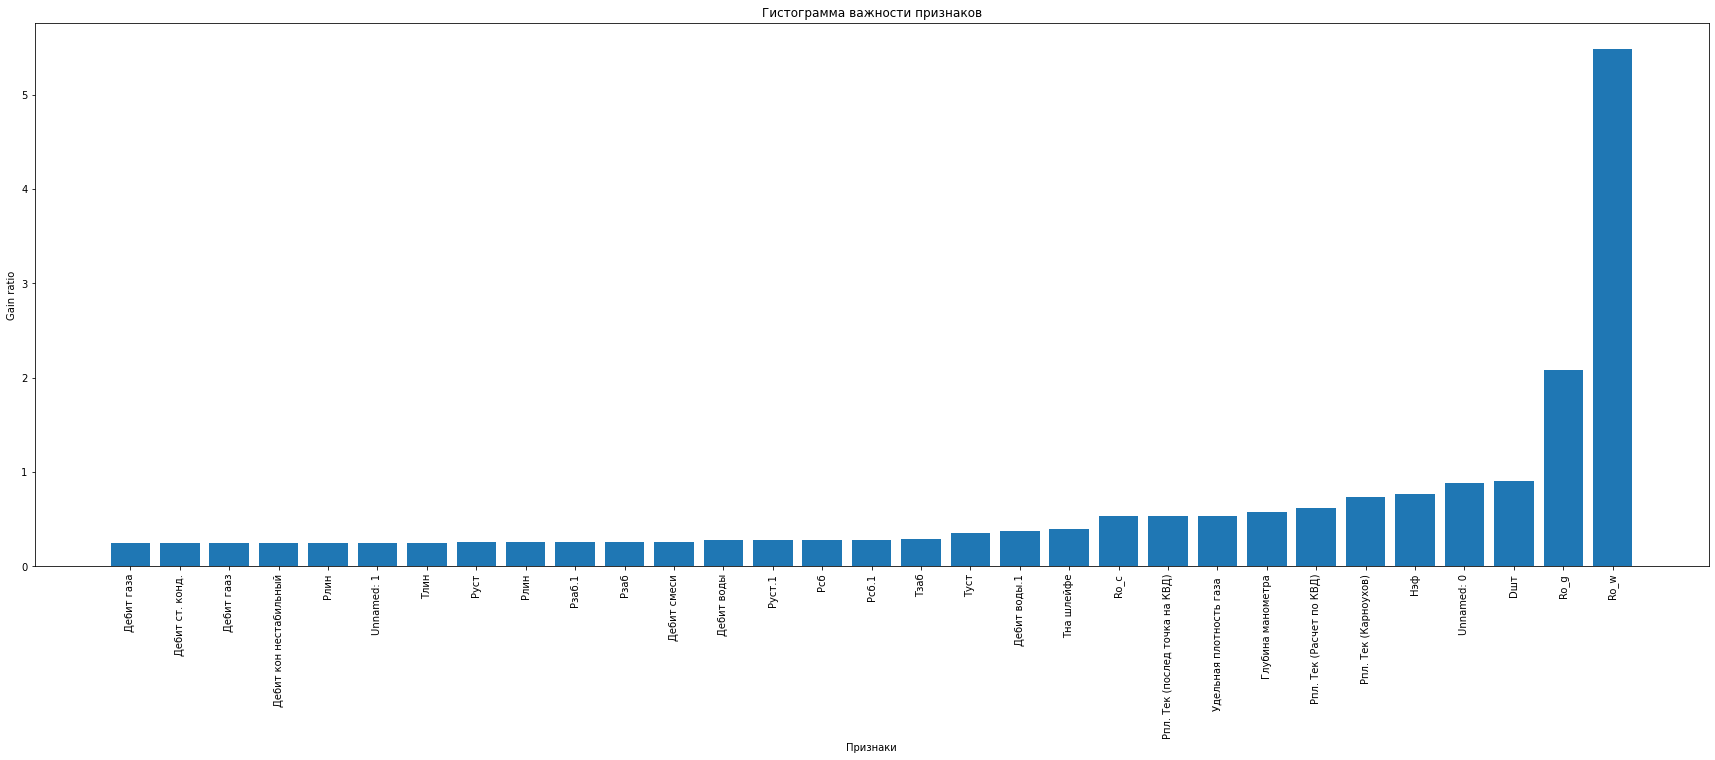

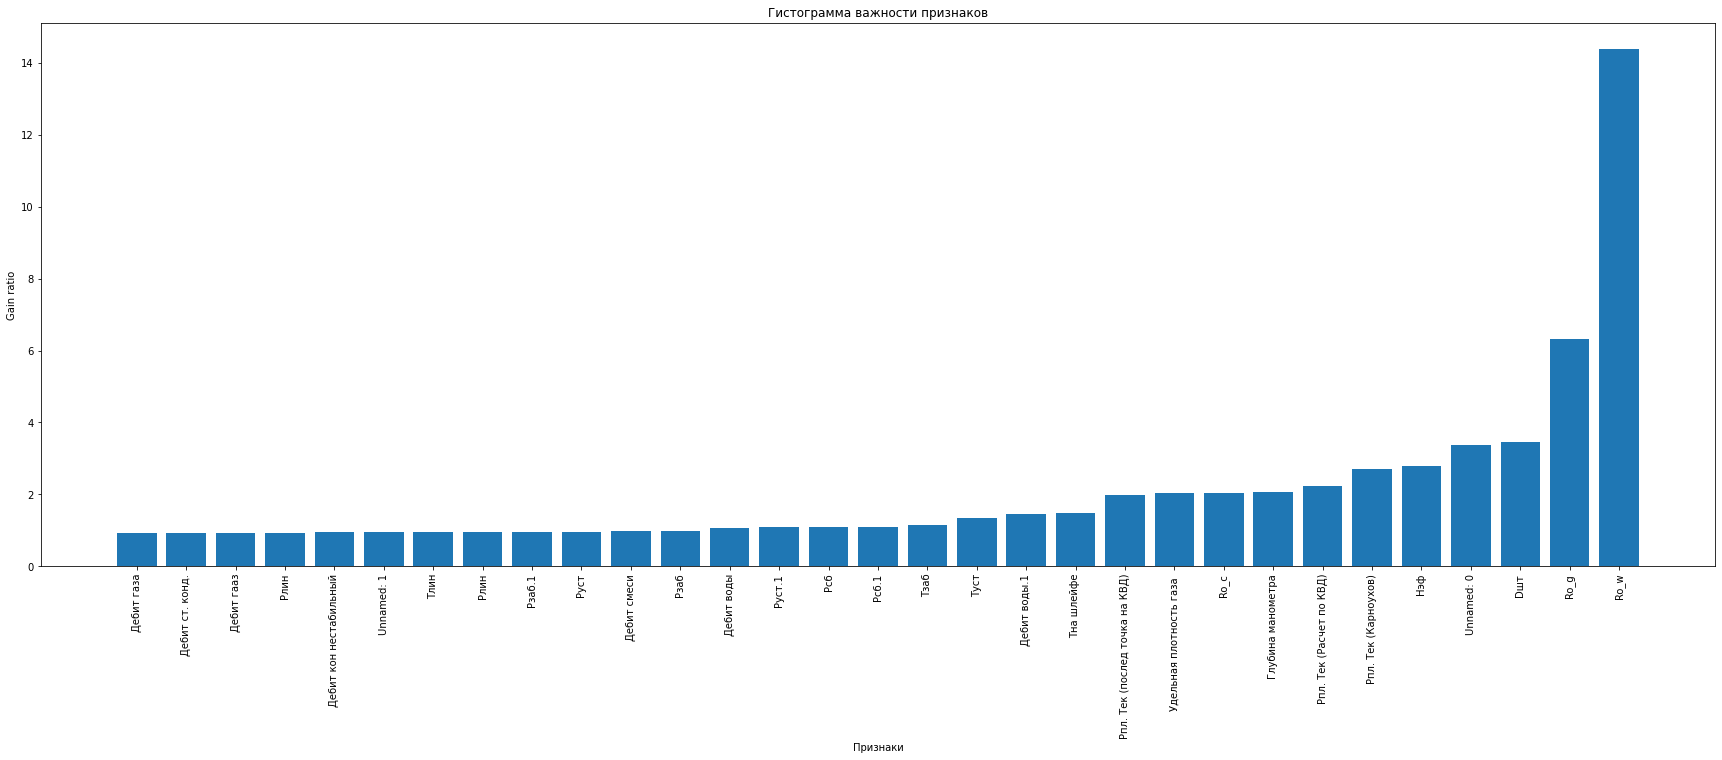

In [11]:
gain_g = dict(sorted(gain_g.items(), key=lambda item: item[1]))
labels = np.array(list(gain_g.keys()))
values = np.array(list(gain_g.values()))

plt.figure(figsize=(30, 10))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Gain ratio')
plt.title('Гистограмма важности признаков')

plt.show()

gain_kgf = dict(sorted(gain_kgf.items(), key=lambda item: item[1]))
labels = np.array(list(gain_kgf.keys()))
values = np.array(list(gain_kgf.values()))

plt.figure(figsize=(30, 10))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Gain ratio')
plt.title('Гистограмма важности признаков')

plt.show()


Построить тепловую карту признаков (матрица корреляций всех признаков со всеми, в том числе целевыми переменными), для удобства коэффициент корреляции берите по модулю

<AxesSubplot:>

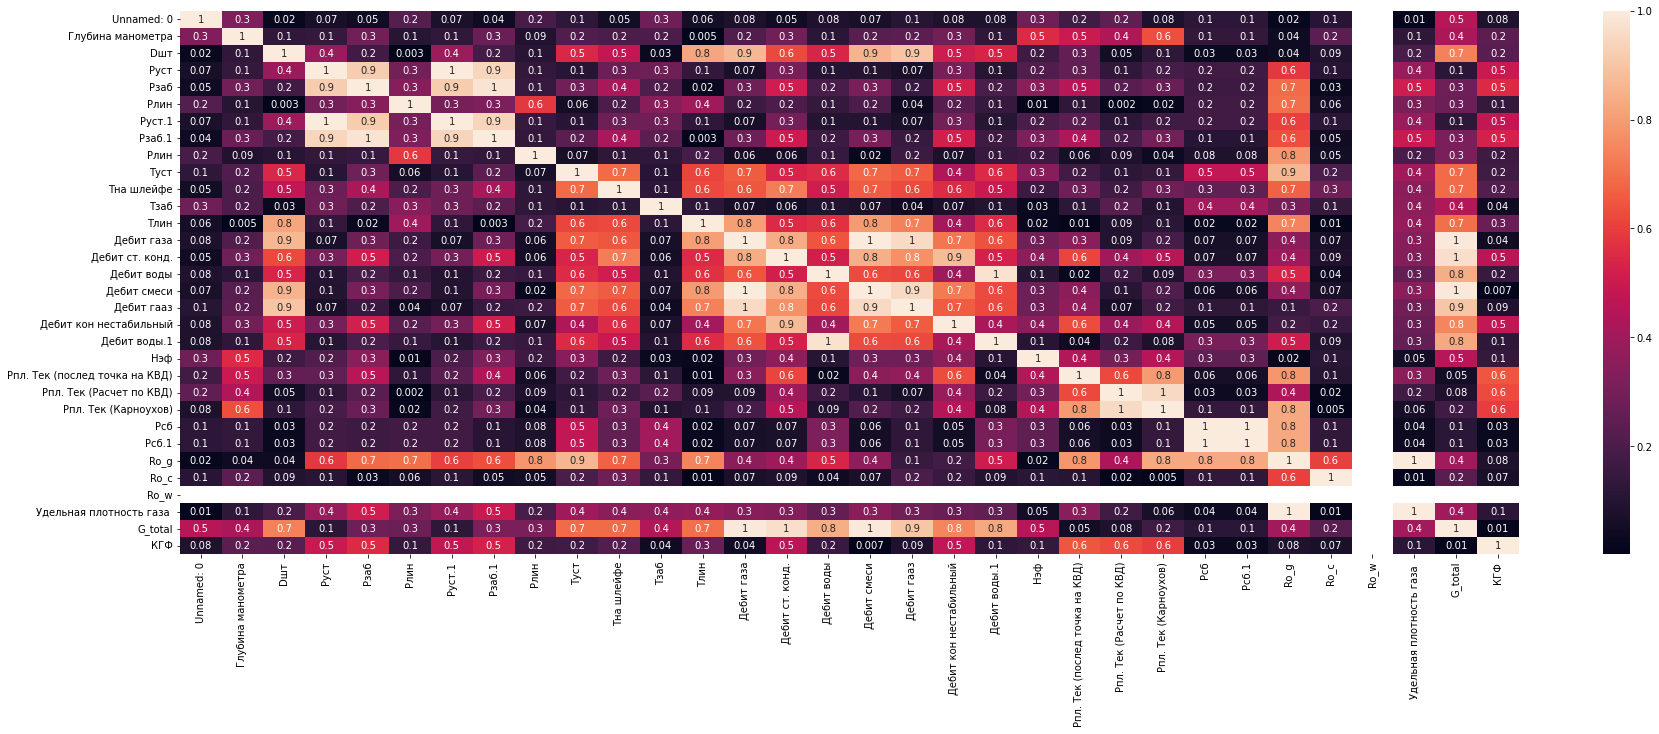

In [12]:
plt.figure(figsize=(30, 10))
sns.heatmap(abs(df.corr()), annot=True, fmt='.1g')


Для каждого признака построить график распределения с отложенными на нем линиями первого и третьего квартилей

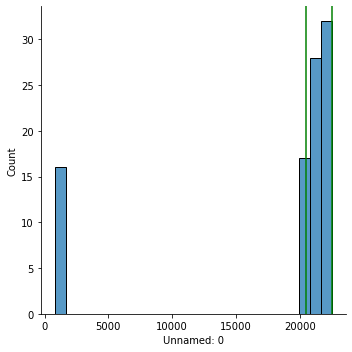

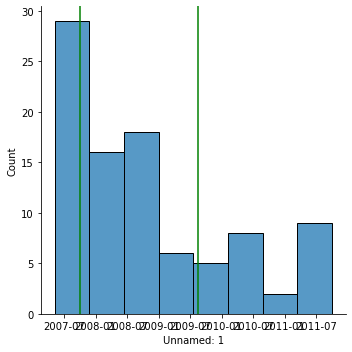

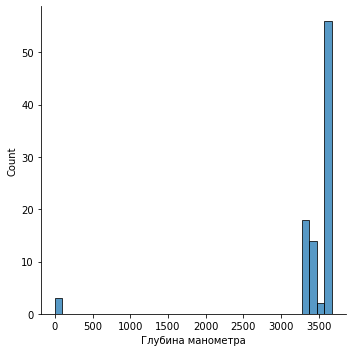

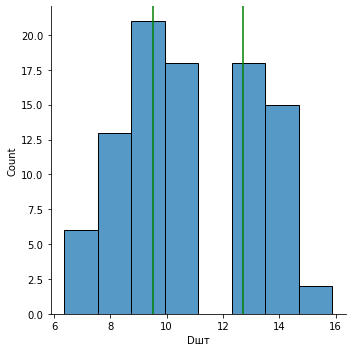

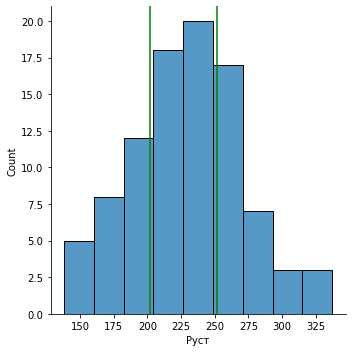

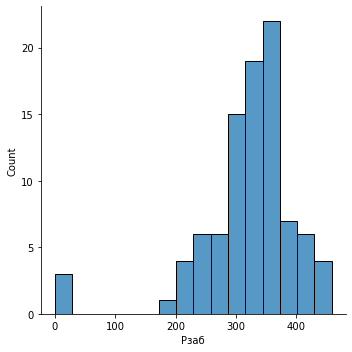

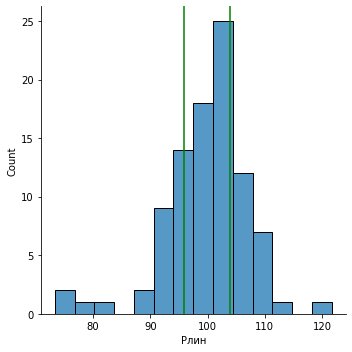

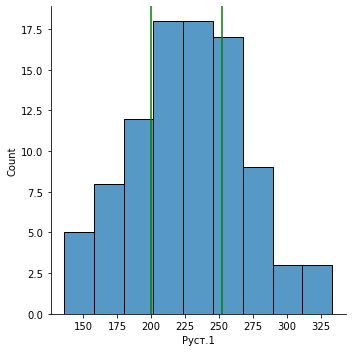

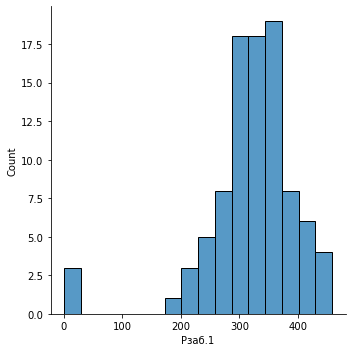

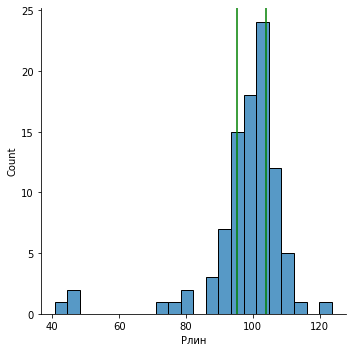

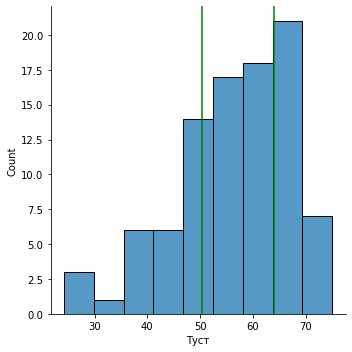

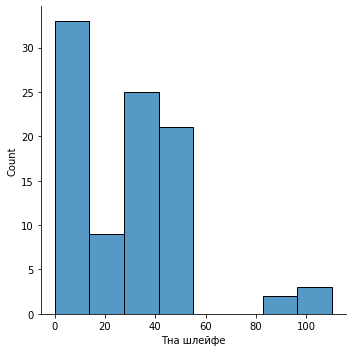

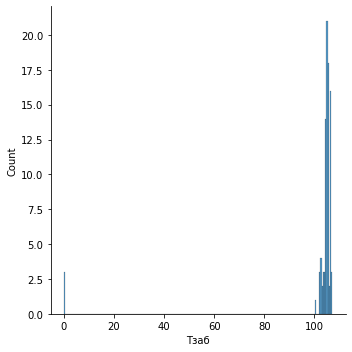

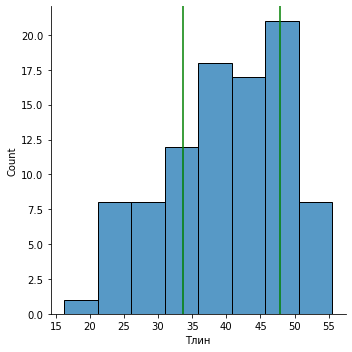

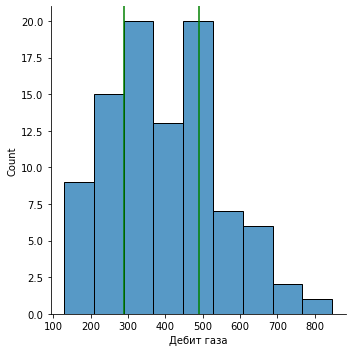

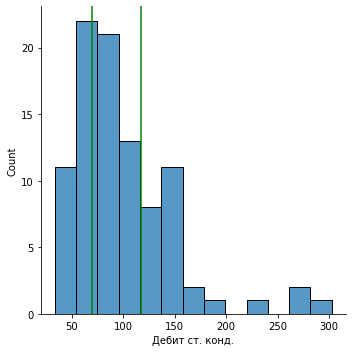

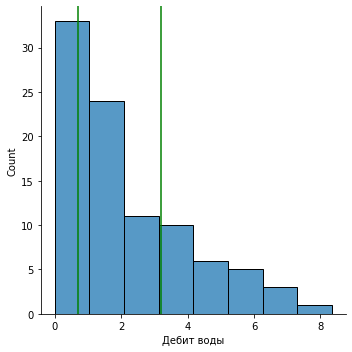

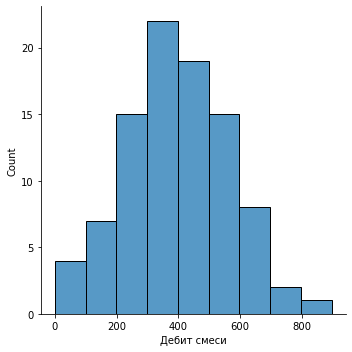

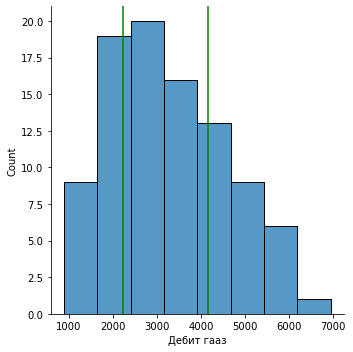

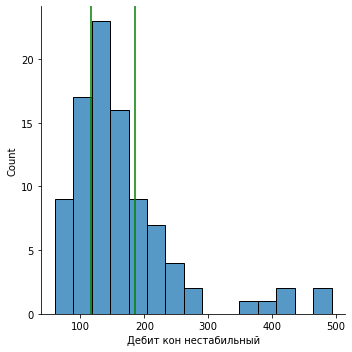

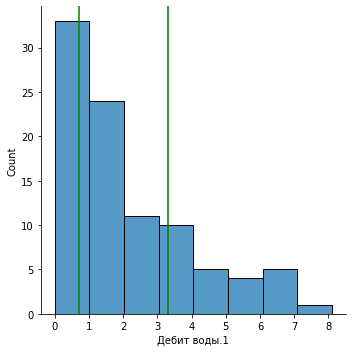

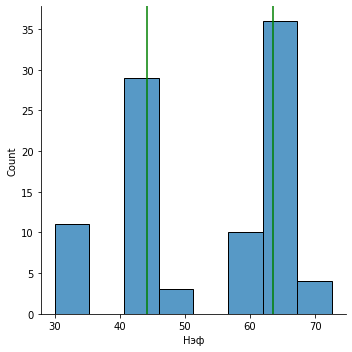

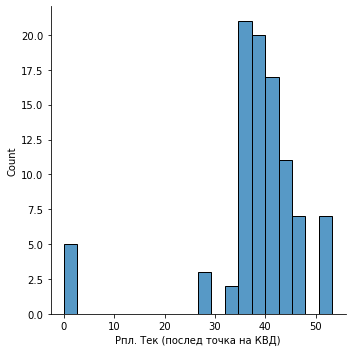

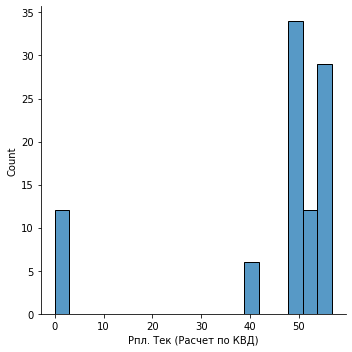

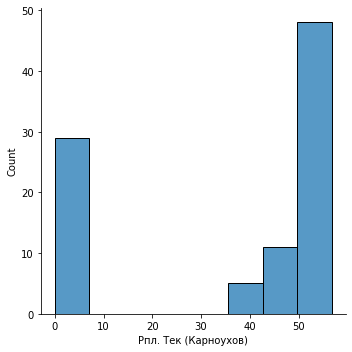

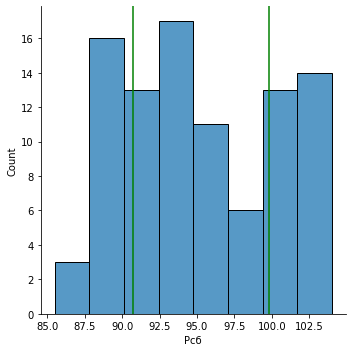

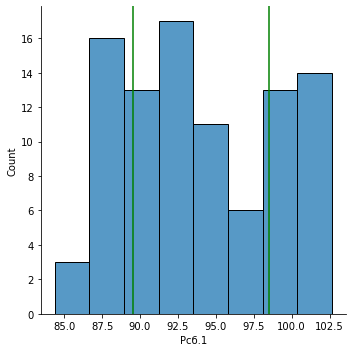

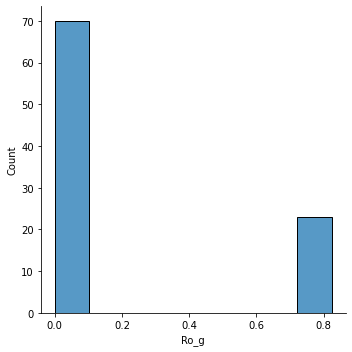

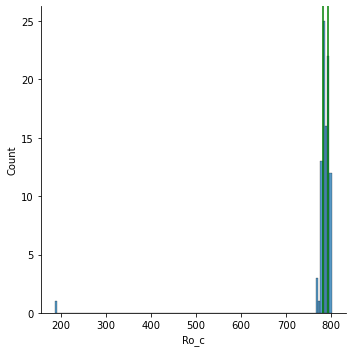

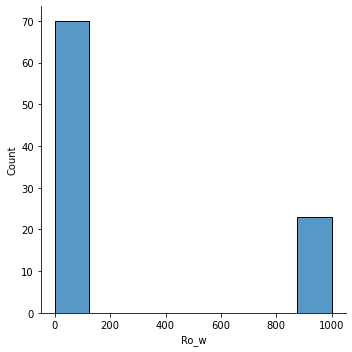

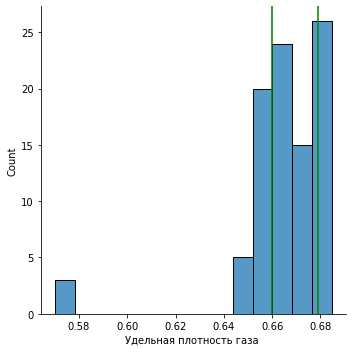

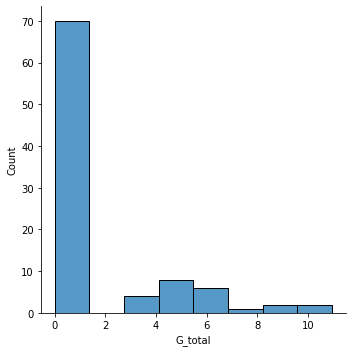

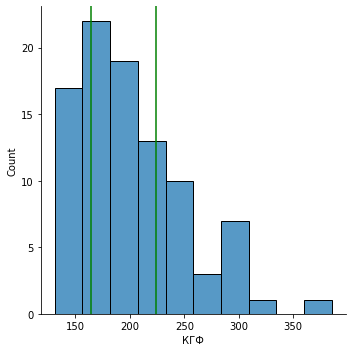

In [13]:
for column in df.columns:
    sns.displot(df[column].replace(np.nan, 0))
    plt.axvline(x=np.quantile(df[column].replace('NaN', 0), 0.25), c="g")
    plt.axvline(x=np.quantile(df[column].replace('NaN', 0), 0.75), c="g")
    plt.show()


Для каждого признака посчитать элементы описательной статистики

In [15]:
df.describe()

,Unnamed: 0,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
count,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,...,81.000000,64.000000,93.000000,93.000000,23.000000,93.000000,23.0,93.000000,23.000000,93.000000
mean,18004.150538,3524.086667,10.951183,228.293412,331.762255,99.860962,227.644269,330.334444,98.005453,56.172043,...,50.943684,50.773437,95.162366,93.917953,0.807631,780.847527,1000.0,0.665260,5.742359,201.705968
std,7918.037821,144.474862,2.423172,41.897238,56.481235,7.300663,41.757127,56.357493,12.425851,11.250781,...,4.378416,4.006591,5.136060,5.068897,0.015076,62.795111,0.0,0.020485,2.112717,49.253925
min,804.000000,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,...,39.900000,41.600000,85.500000,84.381939,0.787416,186.000000,1000.0,0.570000,2.782623,131.000000
25%,20503.000000,3427.625000,9.530000,201.636750,297.797500,95.945951,200.000000,294.625000,95.335032,50.300000,...,48.300000,49.425000,90.700000,89.513940,0.787416,782.000000,1000.0,0.660000,4.381813,164.000000
50%,21203.000000,3579.000000,11.110000,229.894737,337.789172,100.800000,228.000000,334.250000,100.260000,58.000000,...,50.800000,50.900000,94.200000,92.968172,0.806017,787.000000,1000.0,0.667000,5.250915,192.000000
75%,22501.000000,3652.250000,12.700000,252.000000,364.150000,103.865199,252.000000,362.150000,104.000000,64.000000,...,55.400000,52.700000,99.800000,98.494942,0.821344,793.700000,1000.0,0.679000,6.125723,224.000000
max,22503.000000,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,...,56.700000,56.800000,104.000000,102.640020,0.824330,801.000000,1000.0,0.684660,10.931155,385.415949


In [ ]:
df = df.drop(columns=['Ro_w', 'Ro_g', 'Дебит воды', 'Дебит газа',
             'Дебит ст. конд.', 'Дебит смеси', 'Дебит гааз', 'Дебит кон нестабильный'])
